# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the rappers network, since it is built on the rapper Wikipedia pages which contain pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

# Part 1: A little lecture

> [**_Video Lecture_**](https://www.dropbox.com/scl/fi/vj2h6pekdl6y8yid070y5/NLP_Intro.mp4?rlkey=kajuxgfl413ql3q1qwdrqf9ok&dl=0). Today is all about ***working*** with NLTK, so not much lecturing - just a few words on NLP.

# Part 2: Installing and the basics

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies, you can direclty download the collection by typing `nltk.download("book")` instead.

In [1]:
from nltk.book import *

 	
sorted(t for t in set(text2) if 'cie' in t or 'cei' in t)


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


['ancient',
 'ceiling',
 'conceit',
 'conceited',
 'conceive',
 'conscience',
 'conscientious',
 'conscientiously',
 'deceitful',
 'deceive',
 'deceived',
 'deceiving',
 'deficiencies',
 'deficiency',
 'deficient',
 'delicacies',
 'excellencies',
 'fancied',
 'insufficiency',
 'insufficient',
 'legacies',
 'perceive',
 'perceived',
 'perceiving',
 'prescience',
 'prophecies',
 'receipt',
 'receive',
 'received',
 'receiving',
 'society',
 'species',
 'sufficient',
 'sufficiently',
 'undeceive',
 'undeceiving']

## 2.2 Introduction to NLTK

1. Now that you have `nltk` installed, work through Chapter 1, Sections 1 to 4. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

2. Now that you have gone through Chapter 1, let's try some of the `nltk` functionalities on our own Text!

> Setup. We want to start from a clean version of the rapper Wikipedia pages. A version with as little wiki-markup as possible. We needed it earlier to get the links, but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the Wikipedia API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Rappers.csv) of the rappers with pandas `pd.read_csv()` and assign it to `df_rappers`, but change the parameters that you use to call the api to:      
    - `"action": "query"`   
    - `"prop": "extracts"`,
    - `"exlimit":"1"`,
    - `"explaintext": "1"`,
    - `"format": "json"`,
    - `"titles": [INSERT NAME OF THE RAPPER]` 
> * loop through the `Name` column of `df_rappers` and for each name make a request to the API
>     * **Note1** if you are using the `urllib`, replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_RAPPER_HERE)` to build your title;
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note2** the key you are looking for is now `extract` and not `*`; check that your code gets the right page (you may have to do a manual exploration of the json structure again.
>
> Use this method to retrieve a nice copy of all rappers' text. Save each rapper's text in a txt file and collect them all in a new folder!

> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [2]:
import urllib.request
import re
import networkx as nx
import pandas as pd
import os
import json
#from pyvis.network import Network

def fetch_list_of_rappers():
    urlWest = 'https://en.wikipedia.org/wiki/Category:West_Coast_hip_hop_musicians'
    response = urllib.request.urlopen(urlWest)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    westUrl = re.findall('href="/wiki/([^:#"]+)"', textWest)
    urlWest = 'https://en.wikipedia.org/w/index.php?title=Category:West_Coast_hip_hop_musicians&pagefrom=McFedries%2C+Trevor%0ATrevor+McFedries#mw-pages'
    response = urllib.request.urlopen(urlWest)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    westUrl2 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    westUrl = westUrl[17:] + westUrl2[17:]


    urlEast = 'https://en.wikipedia.org/wiki/Category:East_Coast_hip_hop_musicians'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textEast = data.decode('utf-8')
    eastUrl = re.findall('href="/wiki/([^:#"]+)"', textEast)
    urlEast = 'https://en.wikipedia.org/w/index.php?title=Category:East_Coast_hip_hop_musicians&pagefrom=Junglepussy%0AJunglepussy#mw-pages'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    eastUrl2 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    urlEast = 'https://en.wikipedia.org/w/index.php?title=Category:East_Coast_hip_hop_musicians&pagefrom=Stezo#mw-pages'
    response = urllib.request.urlopen(urlEast)
    data = response.read()      # a `bytes` object
    textWest = data.decode('utf-8')
    eastUrl3 = re.findall('href="/wiki/([^:#"]+)"', textWest)
    eastUrl = eastUrl[15:] + eastUrl2[15:] + eastUrl3[15:]

    rappers = eastUrl + westUrl

    return rappers, eastUrl, westUrl

# Fetch data on each rapper from wikipedia and store in a folder called jsons
# -`"action": "query"`   
# - `"prop": "extracts"`,
# - `"exlimit":"1"`,
# - `"explaintext": "1"`,
# - `"format": "json"`,
# - `"titles": [INSERT NAME OF THE RAPPER]`
#os.mkdir('jsons')
# ...

# Loop through the rapper names in westUrl
def fetch_wiki_data(rappers):

    # Base URL for the Wikipedia API
    base_url = 'https://en.wikipedia.org/w/api.php'

    # Loop through the rapper names in westUrl
    for rapper in rappers:
        # Prepare parameters for the API request
        params = {
            "action": "query",
            "prop": "extracts",
            "exlimit": "1",
            "explaintext": "1",
            "format": "json",
            "titles": urllib.parse.quote_plus(rapper.replace(" ", "_"))
        }

        # Construct the full URL
        api_url = base_url + "?" + urllib.parse.urlencode(params)
        
        # Make the request
        response = urllib.request.urlopen(api_url)
        data = json.loads(response.read().decode('utf-8'))
        
        # Parse the JSON data to get the 'extract' key
        # This involves a bit of key navigation since the Wikipedia API's JSON structure nests the page contents under multiple keys
        pages = data.get("query", {}).get("pages", {})
        for page_id, page_data in pages.items():
            content = page_data.get("extract", "")
            if content:
                # Save the content to a .txt file
                with open(f'jsons/{rapper}.txt', 'w', encoding="utf-8") as f:
                    f.write(content)
# Transform all the .json files into .txt files in /jsons and save them in /txts

rappers, east_rappers, west_rappers = fetch_list_of_rappers()

file_list = sorted(os.listdir('jsons'))

# Create a corpus from file_list using PlaintextCorpusReader from nltk.corpus

from nltk.corpus import PlaintextCorpusReader
import nltk

corpus_root = 'jsons'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

text = nltk.Text(wordlists.words())

### 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the rapper Wikipedia text.

> *Exercise 1*: Exploratory analysis
>
> * Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.
> * Also try out the `similar` and `common_contexts` methods, again with any words you like.
> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).
> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.
> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?
> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.
> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

In [83]:
text.common_contexts("child", "children")

text.collocations()

text.index("Snoop")

long_uppercase = [w for w in set(text) if len(w) > 15 and w.isupper()]
sorted(long_uppercase)

No common contexts were found
New York; hip hop; External links; Los Angeles; studio album; stage
name; Hot 100; Snoop Dogg; music video; Hip Hop; Billboard 200;
American rapper; Early life; United States; York City; debut album;
Billboard Hot; better known; High School; Def Jam


['CHRISTMAKWHANNUVUSWALIYEARS', 'SHINIGAMISTARSHIP']

> *Exercise 2*: Basic stats
>
> * How many tokens are there in the rapper Wikipedia text? How many distinct tokens are there?
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the rapper Wikipedia text;
>     2. Compute the lexical diversity related to West (coast) and East (coast). Comment on your results.
> * Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens. 
> * Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.
> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?
> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

0.03937539862953211
0.04773348040760584
0.061930986184503725


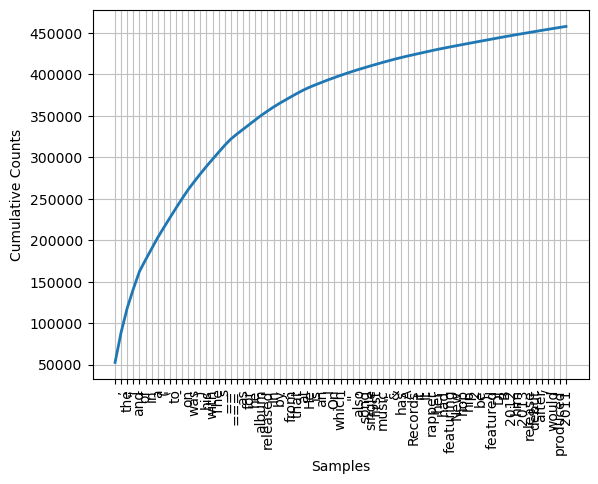

3.886840319230706
978352


In [98]:
# How many tokens are there in the rapper wikipedia text?
len(text)

# Explain in your own words what aspect of language lexical diversity describes
# Compute the lexical diversity of the rapper text

# What is the lexical diversity of the rapper wikipedia text?
print(len(set(text)) / len(text))

# Create corpus for east and west coast rappers using east_rappers and west_rappers and the txt files from /jsons


# Define the save path (assuming your script is in the same directory as /jsons)
save_path = './jsons'

# Step 1: Filter the files for each coast
east_coast_files = [f"{rapper}.txt" for rapper in east_rappers if os.path.exists(os.path.join(save_path, f"{rapper}.txt"))]
west_coast_files = [f"{rapper}.txt" for rapper in west_rappers if os.path.exists(os.path.join(save_path, f"{rapper}.txt"))]

# Step 2: Create Two Separate Corpora
east_coast_corpus = PlaintextCorpusReader(save_path, east_coast_files)
west_coast_corpus = PlaintextCorpusReader(save_path, west_coast_files)

east_coast_text = nltk.Text(east_coast_corpus.words())
west_coast_text = nltk.Text(west_coast_corpus.words())

print(len(set(east_coast_text)) / len(east_coast_text))
print(len(set(west_coast_text)) / len(west_coast_text))

#Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens.

fdist = nltk.FreqDist(text)
fdist.most_common(75)
fdist.plot(75, cumulative=True)

# Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.

four_letter_words = [w for w in text if len(w) == 4]
fdist = nltk.FreqDist(four_letter_words)
#fdist.most_common(75)

# What does the following code do? sum(len(w) for w in rapperWiki) Can you use it to work out the average token length of the rapper Wikipedia text?

print(sum(len(w) for w in text) / len(text))

# Count the files in /jsons

print(len(text))

#Define a function:
#called vocab_size(text) that has a single parameter for the text, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;

def vocab_size(text):
    return len(set(text))

#percent(word, text) that calculates how often a given word occurs in a text, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for Dre.

def percent(word, text):
    return 100 * text.count(word) / len(text)




# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the rapper Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

> *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.
>

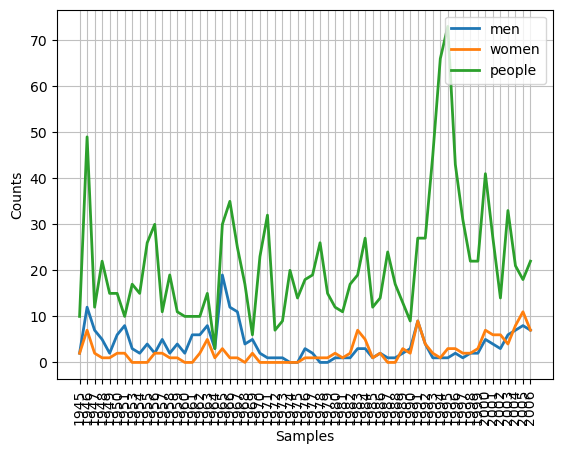

<Axes: xlabel='Samples', ylabel='Counts'>

In [102]:
import nltk
from nltk.corpus import state_union

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    state_union.words('1945-Truman.txt')
except Exception:
    nltk.download('state_union')

# Create a Conditional Frequency Distribution for words "men", "women", and "people"
cfd = nltk.ConditionalFreqDist(
    (word.lower(), fileid[:4])  # word.lower() to make the check case-insensitive
    for fileid in state_union.fileids()
    for word in ['men', 'women', 'people']
    for w in state_union.words(fileid)
    if w.lower() == word
)

# Plot the results
cfd.plot()


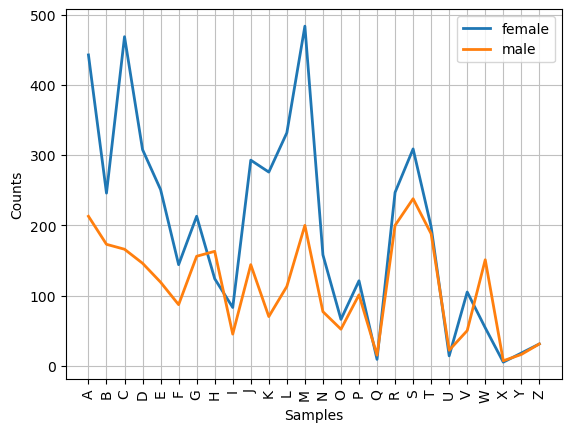

<Axes: xlabel='Samples', ylabel='Counts'>

In [103]:
# Exercise 8

#Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females (cf. 4.4).

import nltk
from nltk.corpus import names

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    names.words('male.txt')
except Exception:
    nltk.download('names')

# Define the Conditional Frequency Distribution
cfd = nltk.ConditionalFreqDist(
    (fileid[:-4], name[0])  # fileid[:-4] will give 'male' or 'female'
    for fileid in names.fileids()
    for name in names.words(fileid)
)

# Plot the results
cfd.plot()


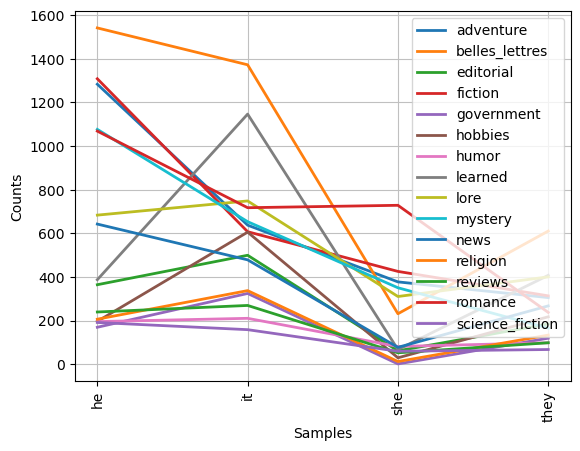

<Axes: xlabel='Samples', ylabel='Counts'>

In [104]:
# Exercise 11

# Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

import nltk
from nltk.corpus import brown

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    brown.categories()
except Exception:
    nltk.download('brown')

pronouns = ["he", "she", "it", "they"]

# Create a Conditional Frequency Distribution
cfd = nltk.ConditionalFreqDist(
    (genre, word.lower())
    for genre in brown.categories()
    for word in brown.words(categories=genre)
    if word.lower() in pronouns
)

# Plot the results
cfd.plot()


In [ ]:
# Exercise 15

# Write a program to find all words that occur at least three times in the Brown Corpus.

import nltk
from nltk.corpus import brown

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    brown.words()
except Exception:
    nltk.download('brown')

# Compute the frequency distribution of words in the Brown Corpus
word_freq = nltk.FreqDist(brown.words())

# Extract words that occur at least three times
words_occurring_at_least_three_times = [word for word, count in word_freq.items() if count >= 3]

print(words_occurring_at_least_three_times)

In [106]:
# Exercise 16

# Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

import nltk
from nltk.corpus import brown

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    brown.categories()
except Exception:
    nltk.download('brown')

# Function to compute the lexical diversity score
def lexical_diversity(text):
    return len(text) / len(set(text))

# Compute lexical diversity scores for each genre in the Brown Corpus
diversity_scores = {}
for genre in brown.categories():
    diversity_scores[genre] = lexical_diversity(brown.words(categories=genre))

# Sort genres by lexical diversity scores
sorted_genres = sorted(diversity_scores.keys(), key=lambda x: diversity_scores[x], reverse=True)

# Display the results
print("Genre\t\t\tLexical Diversity Score")
print("-----------------------------------------")
for genre in sorted_genres:
    print(f"{genre:20}\t{diversity_scores[genre]:.2f}")

# Find the genre with the lowest diversity
lowest_diversity_genre = sorted_genres[0]
print(f"\nThe genre with the lowest diversity (greatest number of tokens per type) is '{lowest_diversity_genre}' with a score of {diversity_scores[lowest_diversity_genre]:.2f}.")


Genre			Lexical Diversity Score
-----------------------------------------
learned             	10.79
belles_lettres      	9.40
government          	8.57
romance             	8.28
mystery             	8.19
adventure           	7.81
lore                	7.61
fiction             	7.36
news                	6.99
hobbies             	6.90
editorial           	6.23
religion            	6.18
reviews             	4.72
science_fiction     	4.48
humor               	4.32

The genre with the lowest diversity (greatest number of tokens per type) is 'learned' with a score of 10.79.


In [107]:
# Exercise 17

# Write a function that finds the 50 most frequently occurring words of a text that are not stopwords.

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    stopwords.words('english')
except Exception:
    nltk.download('stopwords')

def top_non_stopwords(text, n=50):
    """
    Returns the top n frequently occurring words from the text that are not stopwords.
    
    :param text: List of words or tokens.
    :param n: Number of top words to return.
    :return: List of tuples where each tuple is (word, frequency).
    """
    # Convert the list of stopwords to a set for faster membership checking
    stop_words = set(stopwords.words('english'))
    
    # Filter out stopwords from the text
    non_stopwords = [word for word in text if word.lower() not in stop_words]
    
    # Calculate frequency distribution
    freq_dist = FreqDist(non_stopwords)
    
    # Return top n words
    return freq_dist.most_common(n)

# Example usage:
text = nltk.corpus.gutenberg.words('austen-sense.txt')
print(top_non_stopwords(text))


[(',', 9397), ('.', 3975), ('"', 1506), (';', 1419), ("'", 883), ('."', 721), ('Elinor', 684), ('could', 568), ('Marianne', 566), ('Mrs', 530), ('would', 507), ('--', 461), ('said', 397), (',"', 396), ('-', 366), ('every', 361), ('one', 304), ('!', 289), ('much', 287), ('sister', 282), ('must', 279), ('Edward', 262), ('mother', 258), ('Dashwood', 252), ('time', 237), ('know', 230), ('Jennings', 230), ('might', 215), ('Willoughby', 215), ('?"', 213), ('think', 209), ('Miss', 208), ('though', 204), ('well', 191), ('thing', 185), ('Lucy', 185), ('never', 184), ('soon', 180), ('Mr', 178), ('see', 173), ('Colonel', 173), ('without', 171), ('nothing', 170), ('ever', 169), ('may', 169), ('good', 166), ('.--', 166), ('John', 163), ('first', 160), ('?', 160)]


In [112]:
# Exercise 18

# Write a program to print the 50 most frequent bigrams (pairs of adjacent words) of a text, omitting bigrams that contain stopwords.

import nltk
from nltk.corpus import stopwords
from nltk import FreqDist, bigrams

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    stopwords.words('english')
except Exception:
    nltk.download('stopwords')

def frequent_non_stopword_bigrams(text, n=50):
    """
    Returns the top n frequently occurring bigrams from the text that do not contain stopwords.
    
    :param text: List of words or tokens.
    :param n: Number of top bigrams to return.
    :return: List of tuples where each tuple is (bigram, frequency).
    """
    # Convert the list of stopwords to a set for faster membership checking
    stop_words = set(stopwords.words('english'))
    
    # Generate bigrams from the text
    text_bigrams = list(bigrams(text))
    
    # Filter out bigrams containing stopwords
    non_stopword_bigrams = [bg for bg in text_bigrams if bg[0].lower() not in stop_words and bg[1].lower() not in stop_words and bg.isalpha()]
    
    # Calculate frequency distribution
    freq_dist = FreqDist(non_stopword_bigrams)
    
    # Return top n bigrams
    return freq_dist.most_common(n)

# Example usage:
text = nltk.corpus.gutenberg.words('austen-sense.txt')
#print(frequent_non_stopword_bigrams(text)
list(bigrams(text))


[('[', 'Sense'),
 ('Sense', 'and'),
 ('and', 'Sensibility'),
 ('Sensibility', 'by'),
 ('by', 'Jane'),
 ('Jane', 'Austen'),
 ('Austen', '1811'),
 ('1811', ']'),
 (']', 'CHAPTER'),
 ('CHAPTER', '1'),
 ('1', 'The'),
 ('The', 'family'),
 ('family', 'of'),
 ('of', 'Dashwood'),
 ('Dashwood', 'had'),
 ('had', 'long'),
 ('long', 'been'),
 ('been', 'settled'),
 ('settled', 'in'),
 ('in', 'Sussex'),
 ('Sussex', '.'),
 ('.', 'Their'),
 ('Their', 'estate'),
 ('estate', 'was'),
 ('was', 'large'),
 ('large', ','),
 (',', 'and'),
 ('and', 'their'),
 ('their', 'residence'),
 ('residence', 'was'),
 ('was', 'at'),
 ('at', 'Norland'),
 ('Norland', 'Park'),
 ('Park', ','),
 (',', 'in'),
 ('in', 'the'),
 ('the', 'centre'),
 ('centre', 'of'),
 ('of', 'their'),
 ('their', 'property'),
 ('property', ','),
 (',', 'where'),
 ('where', ','),
 (',', 'for'),
 ('for', 'many'),
 ('many', 'generations'),
 ('generations', ','),
 (',', 'they'),
 ('they', 'had'),
 ('had', 'lived'),
 ('lived', 'in'),
 ('in', 'so'),
 ('so

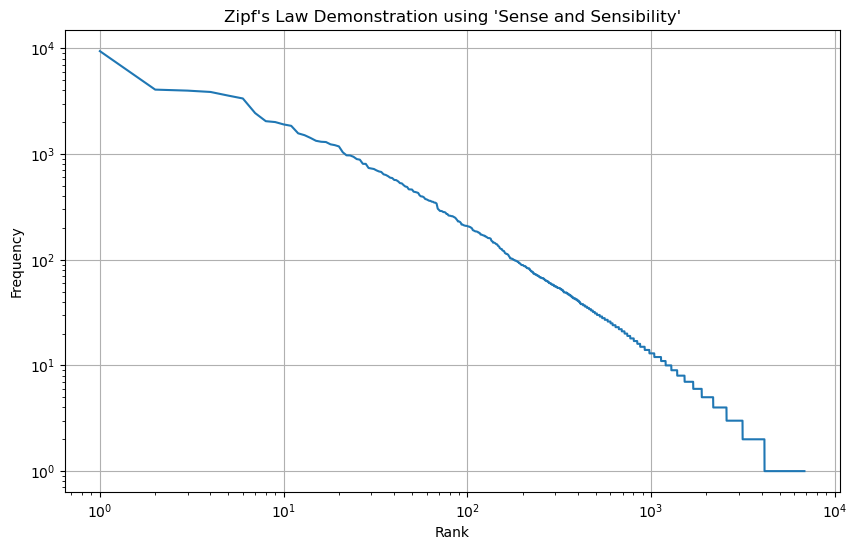

In [113]:
# Exercise 2.8.23 on Zipf's law

#Work through exercise 2.8.23 on Zipf's law. Zipf's law connects to a property of the Barabasi-Albert networks. Which one? Take a look at this article and write a paragraph or two describing other important instances of power-laws found on the internet.

import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# Check if 'nltk' datasets have been downloaded, if not, download them
try:
    gutenberg.words('austen-sense.txt')
except Exception:
    nltk.download('gutenberg')

# Tokenize the words and compute the frequency distribution
words = gutenberg.words('austen-sense.txt')
fdist = FreqDist(words)

# Sort words by their frequency
sorted_words = sorted(fdist.keys(), key=lambda x: fdist[x], reverse=True)

# Get ranks and frequencies
ranks = range(1, len(sorted_words) + 1)
frequencies = [fdist[word] for word in sorted_words]

# Plot on a log-log graph
plt.figure(figsize=(10, 6))
plt.loglog(ranks, frequencies)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Zipf's Law Demonstration using 'Sense and Sensibility'")
plt.grid(True)
plt.show()
